# Machine Learning (laboratory instruction)
## Logistic regression

### Submission

<u>Submission:</u>

Compress all files into **single zip** archive and submit via Wikamp. See below the content of the archive (replace the `name` and `surname` with proper values):
```
📂 name.surname.zip
+-- 📜 04-Logistic regression.ipynb
+-- 📜 device.npz
```

<u>Grades</u>

| Percentage of all points | mark |
| :----                    | ---: |
| [0-50)   | 2   |
| [50-60)  | 3   |
| [60-70)  | 3.5 |
| [70-80)  | 4   |
| [80-90)  | 4.5 |
| [90-100] | 5   |

<u>Penalties</u>

* `mark - 0.5` if tasks are submitted after laboratory (but less than 7 days); 
* `mark - 1` if tasks are submitted after one week (>=7 days but < 14 days);
* `mark - 1.5` if tasks are submitted later than two weeks (>=14 days).

<u>Warning:</u>

It is NOT allowed to share your .ipynb file with other students nor Internet. All students should download the exercise files directly from WIKAMP. Group work is considered as plagiarism.

<u>Plagiarism Disclaimer:</u>

I hereby declare that this exercise is my own and autonomous work. I am aware of the consequences and I am familiar with the university regulations.

### The goal
Apply Logistic regression algorithm to classification problem.


### Task 1. Read the dataset from file (*0 points*).

Read the dataset from file. 
This is a dataset that contains information read from sensors of cars' devices. The value 0 indicates that all the devices are original, and 1 means that at least one of the devices was replaced (not authorized).

**Tip**: You can use below code to read the data:

```python
with open('device.npz', 'rb') as f:
    data = np.load(f)
    x, y = data['x'], data['y']
    
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.5, random_state=123, shuffle=True)  
```




In [1]:
# >>> WRITE YOUR CODE BELOW <<<
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.model_selection

with open('device.npz', 'rb') as f:
    data = np.load(f)
    x, y = data['x'], data['y']

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.5, random_state=123, shuffle=True)  

### Task 1. Apply Logistic regression algorithm.

**Tasks:**
1. Use Logistic regression algorithm to perform classification.
2. Use Accuracy (and loss) metric to check the model results.
3. Explore the parameters of the implementation you use.

**Note**: You should use implementation that uses Gradient Descent (or any variant) to train the model.

$$
\texttt{Accuracy} = \frac{T}{N}
$$

where $T$ - number of correctly classified samples, $N$ - number of all samples.


Accuracy: 0.834
Mean Absolute Error: 0.166
Mean Squared Error: 0.166
Mean Root Squared Error: 0.4074309757492673
Confusion matrix: 
 [[201  37]
 [ 46 216]]


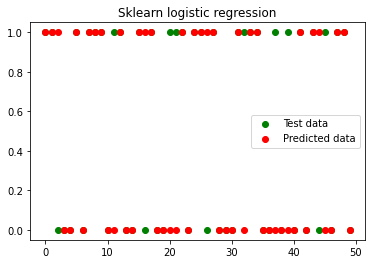

In [8]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

lr = make_pipeline(StandardScaler(), SGDClassifier(loss = "log", alpha=0.5, max_iter=10000, tol=0.0001))
lr.fit(x_train, y_train)

y_lr_pred = lr.predict(x_test)

plt.title("Sklearn logistic regression")
plt.scatter(range(len(x_test[:50])), y_test[:50], color = "green", label = "Test data")
plt.scatter(range(len(x_test[:50])), y_lr_pred[:50], color = "red", label = "Predicted data")
plt.legend()
print(f'Accuracy: {lr.score(x_test,y_test)}')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_lr_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_lr_pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, y_lr_pred)))
print(f"Confusion matrix: \n {metrics.confusion_matrix(y_test, y_lr_pred)}")

In [95]:
# The best accuracy result (approximately 0.836) was obtained while setting alpha=0.5
# Decreasing the value of aplha leeded to drop with the accuracy level 
# to approximately 0.754
